In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fraunhofer_propagation
from scipy.ndimage import gaussian_filter

In [2]:
grid_dimension = 500
lambda_ = 2.75e-10
I0 = 1e6
w = 10e-6

In [3]:
N_F = [1e-6, 1e-4, 1e-2, 4]

## Simple case - beam passing through square aperture

In [4]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 750

w=25e-6
z=25

In [5]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(2*w, 2*w, 0, F_in)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X<=-w] = 0 +0j
E_in[X>=w] = 0 +0j
E_in[Y<=-w] = 0 +0j
E_in[Y>=w] = 0 +0j

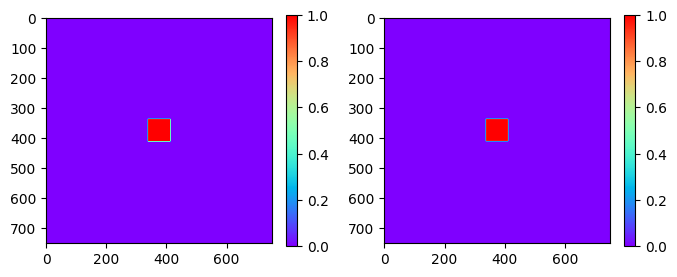

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [7]:
F_out = lp.Forvard(F_in, z)
E_out = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

In [8]:
def I_theoretical(x,y,w,lambda_,z):
    return 16*w**4/(lambda_**2*z**2)*np.sinc(2*w*x/(lambda_*z))**2*np.sinc(2*w*y/(lambda_*z))**2

I_plot = I_theoretical(X, Y, w, lambda_, z)

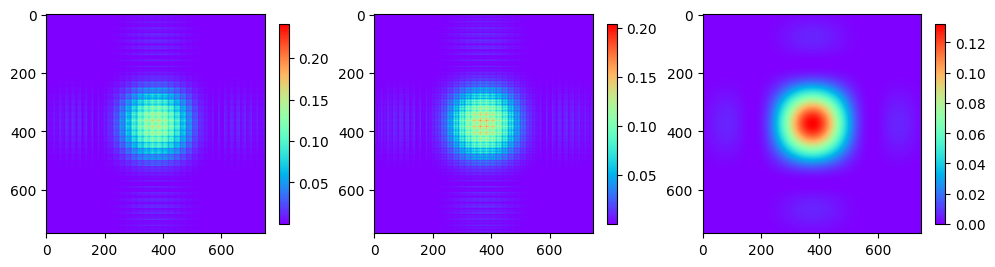

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='rainbow')
im3=ax[2].imshow(I_plot, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

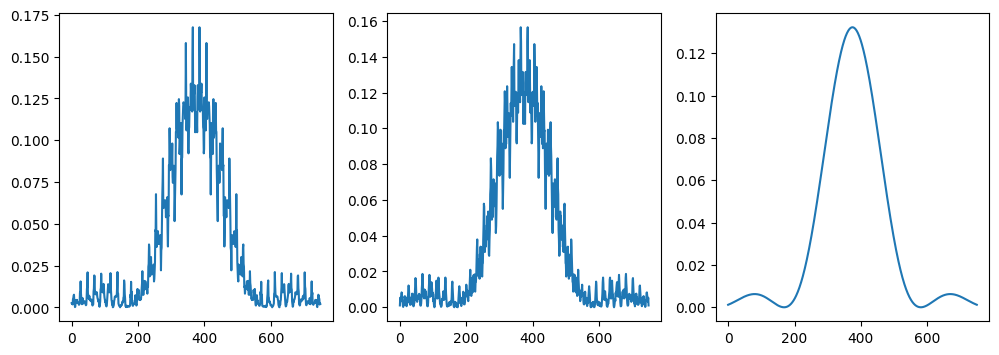

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)])**2)
ax[2].plot(I_plot[int(len(I_plot)/2)])

In [11]:
def E_theoretical(x,y,w,lambda_,z):
    k = 2*np.pi/lambda_
    return np.exp(1j*k*z)*np.exp(1j*k/(2*z)*(x**2+y**2))/(1j*lambda_*z)*4*w*w*np.sinc(2*w*x/(lambda_*z))*np.sinc(2*w*y/(lambda_*z))

E_plot = E_theoretical(X, Y, w, lambda_, z)

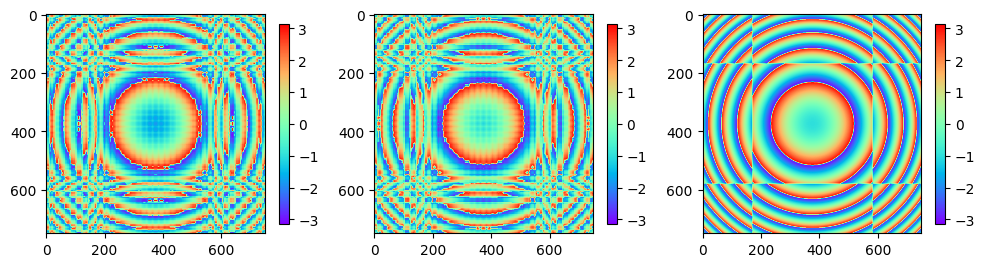

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out), cmap='rainbow')
im2=ax[2].imshow(np.angle(E_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

## Simple case - beam passing through circle aperture

In [13]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 750

w=25e-6
z=25

In [14]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.CircAperture(w, 0, 0, F_in)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X**2 + Y**2 >= w**2] = 0 +0j

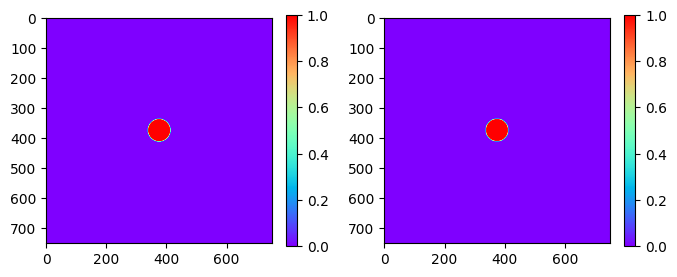

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [16]:
F_out = lp.Forvard(F_in, z)
E_out = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

In [17]:
from scipy.special import jv

def I_theoretical(x,y,w,lambda_,z):
    r = np.sqrt(x**2 + y**2)
    k = 2 * np.pi / lambda_
    A = np.pi * w * w

    return np.exp(1j * lambda_ * z) * np.exp(1j * k/(2*z) * r**2) * A/(1j * lambda_ * z) * (2*jv(1,k*w/z*r)/(k*w/z*r))

I_plot = I_theoretical(X, Y, w, lambda_, z)

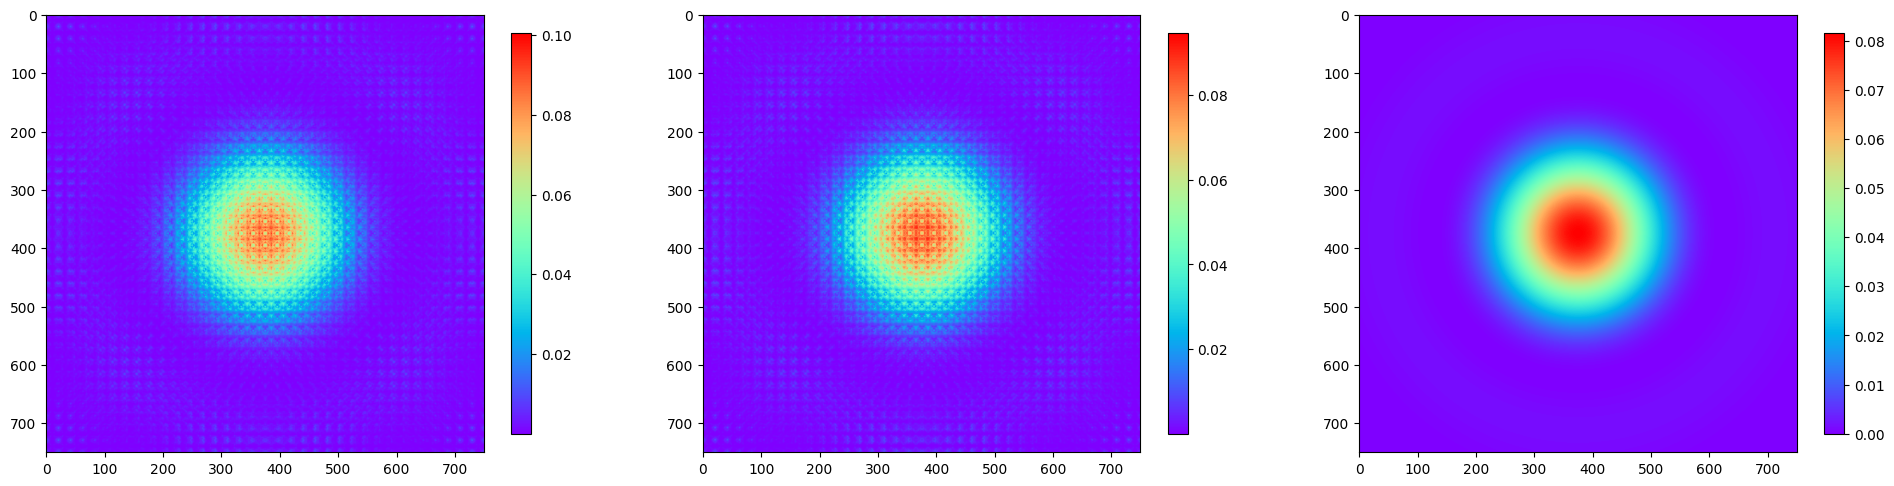

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(24,8))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='rainbow')
im3=ax[2].imshow(np.abs(I_plot)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

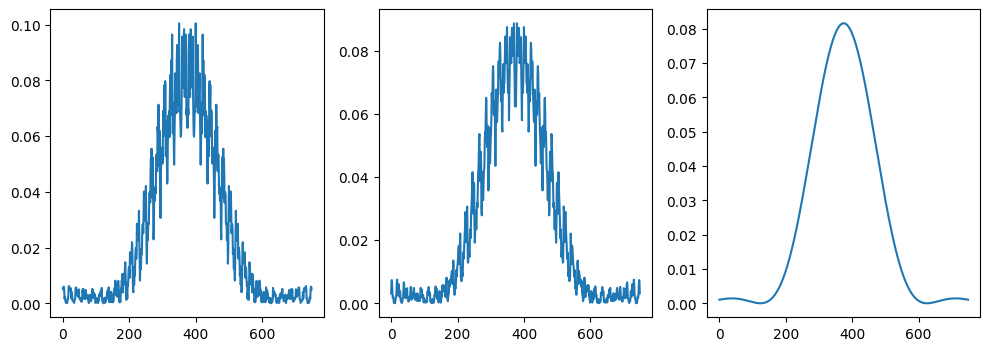

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)])**2)
ax[2].plot(np.abs(I_plot[int(len(I_plot)/2)])**2)

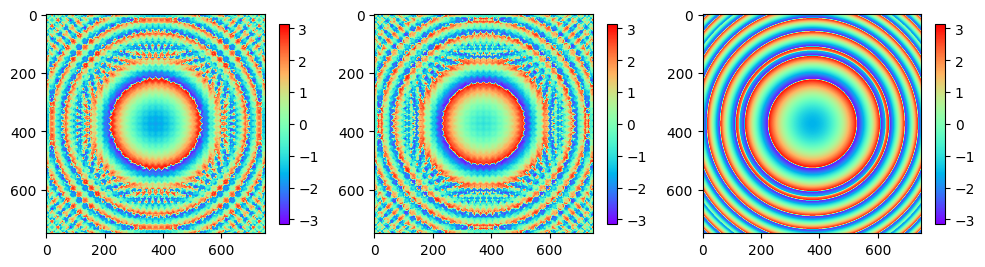

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out), cmap='rainbow')
im2=ax[2].imshow(np.angle(I_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

## Simple case - sinusoidal amplitude grating

In [21]:
# known case from LightPipes

grid_size = 1e-3
lambda_ = 2.75e-10
grid_dimension = 750

w=30e-6
z=20
f0=50000

In [22]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(2*w, 2*w, 0, F_in)
F_in.field *= (1/2 + 1/2*np.cos(2*np.pi*f0*F_in.xvalues))

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X<=-w] = 0 +0j
E_in[X>=w] = 0 +0j
E_in[Y<=-w] = 0 +0j
E_in[Y>=w] = 0 +0j

E_in *= (1/2 + 1/2*np.cos(2*np.pi*f0*x))

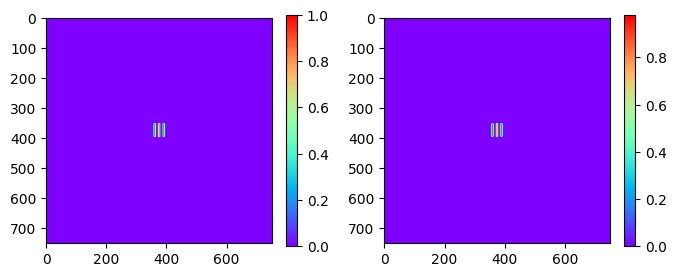

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [24]:
F_out = lp.Forvard(F_in, z)
E_out = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

In [25]:
def I_theoretical(x,y,w,lambda_,z):
    A = 2*w*2*w
    k = 2*np.pi/lambda_

    term1 = A/(1j*2*lambda_*z) * np.exp(1j*k*z) * np.exp(1j*k/(2*z)*(x**2+y**2)) * np.sinc(2*w*y/(lambda_*z))
    term2 = np.sinc(2*w*x/(lambda_*z))
    term3 = 1/2*np.sinc(2*w/(lambda_*z)*(x+f0*lambda_*z))
    term4 = 1/2*np.sinc(2*w/(lambda_*z)*(x-f0*lambda_*z))

    return term1 * (term2 + term3 + term4)

I_plot = I_theoretical(X, Y, w, lambda_, z)

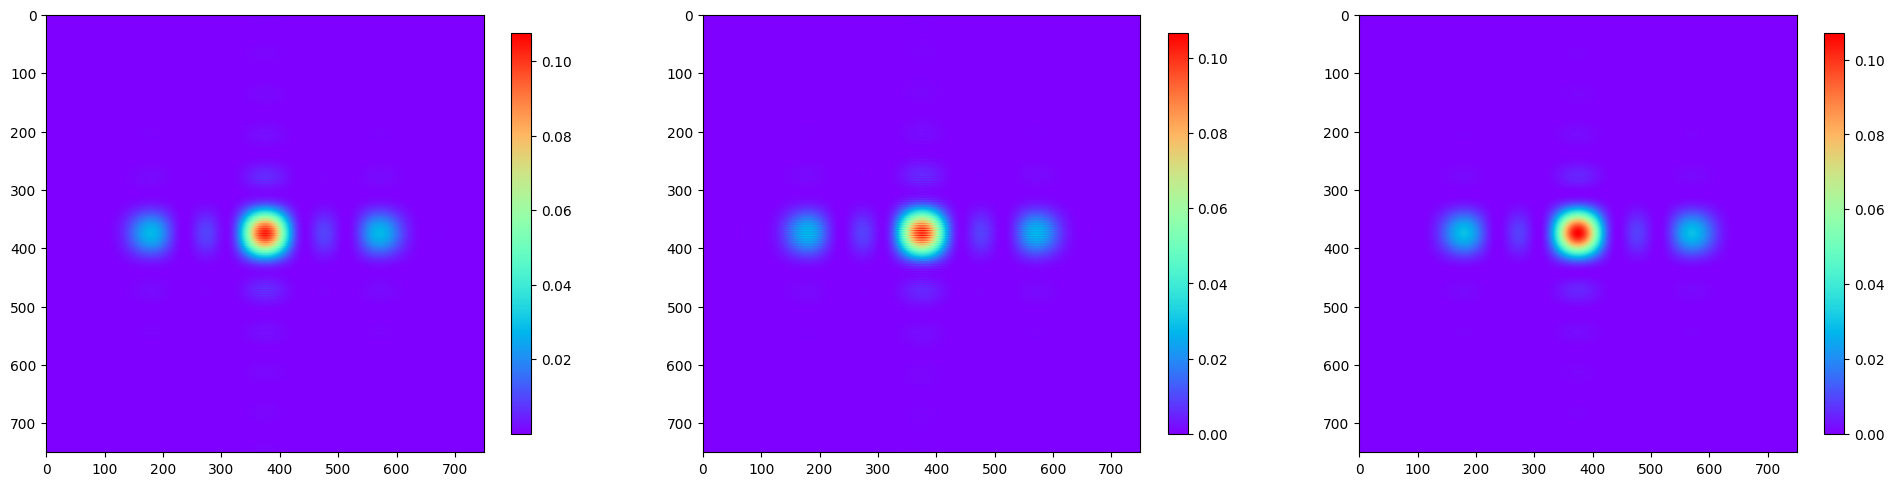

In [26]:
fig, ax = plt.subplots(ncols=3, figsize=(24,8))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='rainbow')
im3=ax[2].imshow(np.abs(I_plot)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im3, ax=ax[2], shrink=0.65)

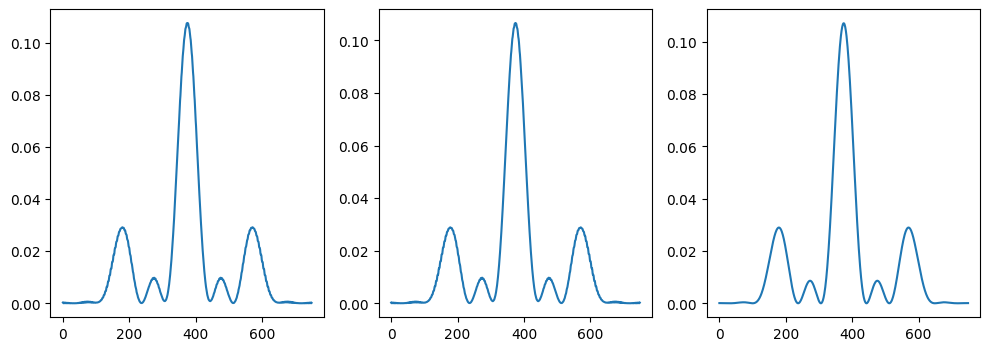

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)])**2)
ax[2].plot(np.abs(I_plot[int(len(I_plot)/2)])**2)

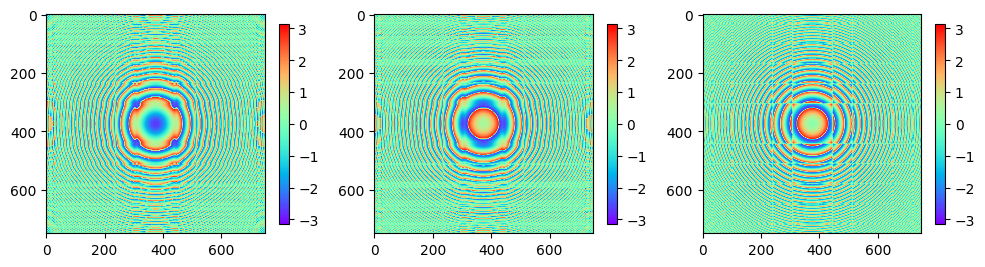

In [28]:
fig, ax = plt.subplots(ncols=3, figsize=(12,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out), cmap='rainbow')
im2=ax[2].imshow(np.angle(I_plot), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)
fig.colorbar(im2, ax=ax[2], shrink=0.65)

In [29]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

print("\nTheoretical method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(I_plot)**2))

LightPipes comparison:
in = 759.3750000000002 | out = 759.3750000000001

Custom method:
in = 741.5098276248909 | out = 741.5098276248912

Theoretical method:
in = 741.5098276248909 | out = 742.8838152472151


## Simple case using a Gaussian beam

In [30]:
# known case from LightPipes

grid_size = 500e-6
lambda_ = 2.75e-10
grid_dimension = 750

w=25e-6
z=25

In [31]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.GaussAperture(F_in, w)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = create_gaussian_mask(X, Y, diameter=2*w)

F_out = lp.Forvard(F_in, z)
E_out = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

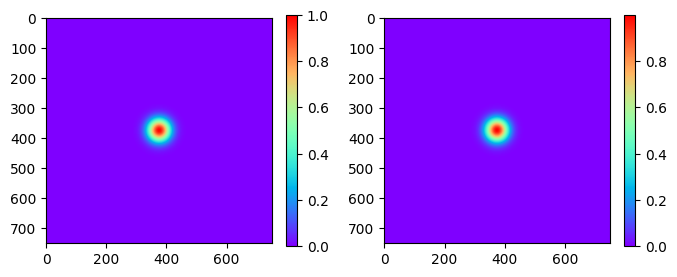

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

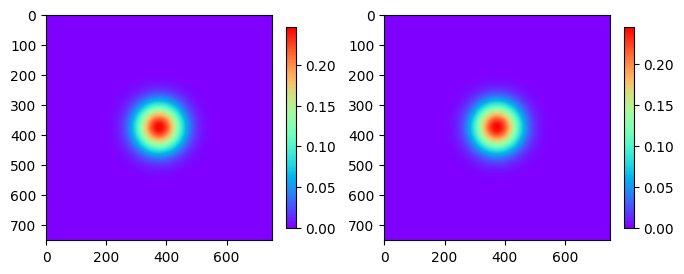

In [33]:
# intensity plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='rainbow')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)

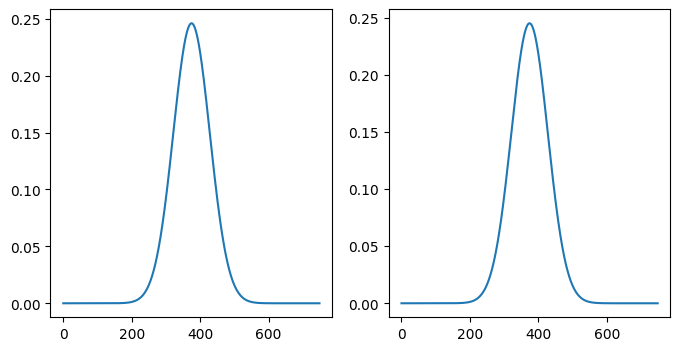

In [34]:
# cross section plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

ax[0].plot(np.abs(F_out.field[int(len(F_out.field)/2)])**2)
ax[1].plot(np.abs(E_out[int(len(E_out)/2)])**2)

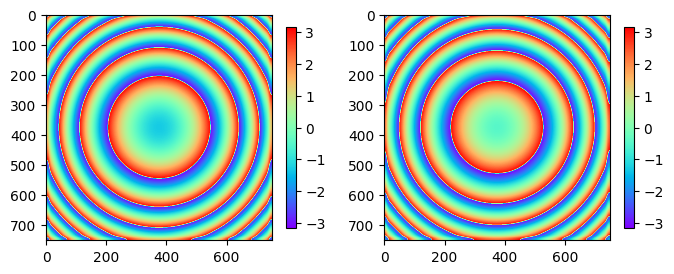

In [35]:
# intensity plots

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='rainbow')
im2=ax[1].imshow(np.angle(E_out), cmap='rainbow')

fig.colorbar(im1, ax=ax[0], shrink=0.65)
fig.colorbar(im2, ax=ax[1], shrink=0.65)

In [36]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))

print("\nCustom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

LightPipes comparison:
in = 4417.864669110648 | out = 4417.864669110643

Custom method:
in = 4406.091550641318 | out = 4406.091550641316
